In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('default')
plt.style.use('dark_background')

In [41]:
us_following = pd.read_csv('us_following.csv')
uk_following = pd.read_csv('uk_following.csv')

us_following

,input.session_id,input.user_id,users.pk,users.username,users.full_name,users.is_private,users.profile_pic_url,users.is_verified,users.has_anonymous_profile_picture,users.latest_reel_media,users.is_favorite,users.profile_pic_id,sections,big_list,next_max_id,page_size,status
0,XXX,383078,35894170,dateemaki,は が み お,True,https://scontent-lga3-1.cdninstagram.com/vp/c5...,False,False,0,False,NaN,NaN,True,50.0,200,ok
1,XXX,383078,8001911,suge935,suge935,True,https://scontent-lga3-1.cdninstagram.com/vp/51...,False,False,0,False,1618829644664215262_8001911,NaN,True,50.0,200,ok
2,XXX,383078,2839965741,2madoka1,Madoka Iwakuma,True,https://scontent-lga3-1.cdninstagram.com/vp/a7...,False,False,0,False,1707014505495720624_2839965741,NaN,True,50.0,200,ok
3,XXX,383078,412840713,kazboyz1981,Kazuyoshi Takeda,False,https://scontent-lga3-1.cdninstagram.com/vp/ba...,False,False,0,False,NaN,NaN,True,50.0,200,ok
4,XXX,383078,1479592696,arbor.shin,Shin.Ｋ,False,https://scontent-lga3-1.cdninstagram.com/vp/ff...,False,False,0,False,NaN,NaN,True,50.0,200,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277890,XXX,2917339425,193581073,dickiebug,kaitlyn dickie,True,https://scontent-lga3-1.cdninstagram.com/vp/73...,False,False,0,False,1849763745635611440_193581073,NaN,True,50.0,200,ok
277891,XXX,2917339425,49613049,gabriel062017,Kevin Gabriel Espada,True,https://scontent-lga3-1.cdninstagram.com/vp/30...,False,False,0,False,2017337310493043776_49613049,NaN,True,50.0,200,ok
277892,XXX,2917339425,192106985,hunnadages,Hunter Dages,False,https://scontent-lga3-1.cdninstagram.com/vp/20...,False,False,0,False,2123517252918928213_192106985,NaN,True,50.0,200,ok
277893,XXX,2917339425,186401551,lindsey.ashtin,Lindsey,True,https://scontent-lga3-1.cdninstagram.com/vp/b8...,False,False,0,False,1975008558447525456_186401551,NaN,True,50.0,200,ok


In [59]:
us_sample_size = len(us_following['input.user_id'].unique())
uk_sample_size = len(uk_following['input.user_id'].unique())

In [70]:
us_sample_size

5649

In [71]:
uk_sample_size

5771

In [ ]:
us_following['location'] = 'US'
uk_following['location'] = 'UK'

us_following['follow_weight'] = 1 / us_sample_size
uk_following['follow_weight'] = 1 / uk_sample_size

combined_following = pd.concat([us_following, uk_following], sort=False)

In [60]:
top_users = combined_following['users.username'] \
    .value_counts() \
    .sort_values(ascending=False)[0:20]

top_users

instagram               73
arianagrande            43
champagnepapi           35
floydmayweather         30
iamcardib               25
thenotoriousmma         19
billieeilish            19
2chainz                 19
theellenshow            19
iamzlatanibrahimovic    17
nasa                    16
dior                    16
natgeowild              15
davidbeckham            15
joerogan                15
justinbieber            14
mileycyrus              14
inthestyle              14
cristiano               14
sirjoancornella         14
Name: users.username, dtype: int64

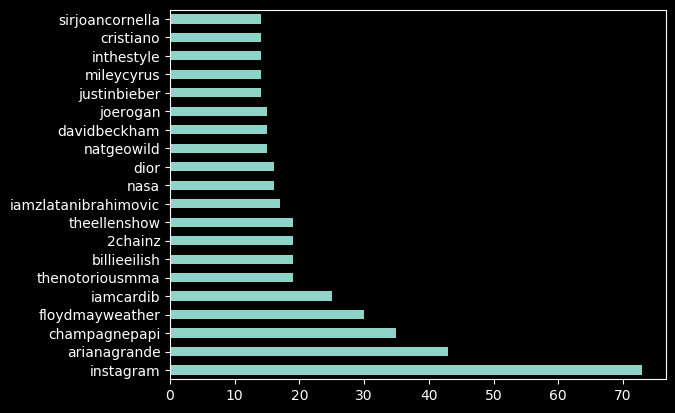

In [69]:
top_users.plot(kind='barh')

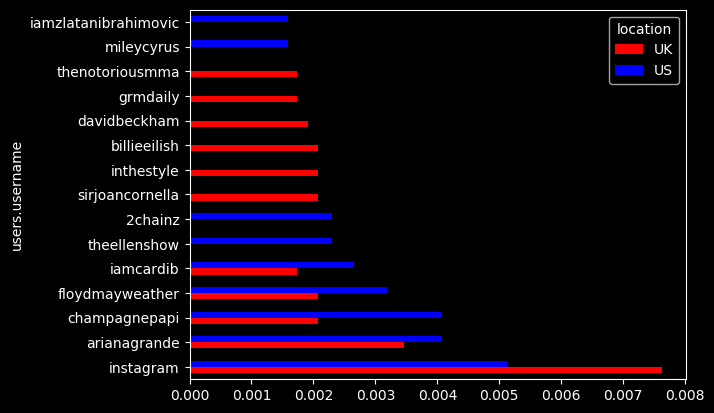

In [68]:
combined_following.groupby(['location', 'users.username'])['follow_weight'] \
    .sum() \
    .sort_values(ascending=False)[0:20] \
    .unstack() \
    .transpose() \
    .plot(kind='barh', color=['red', 'blue'])